In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load results
with open('./data/GroundTruth/prediction_results.json', 'r') as f:
    samples = json.load(f)

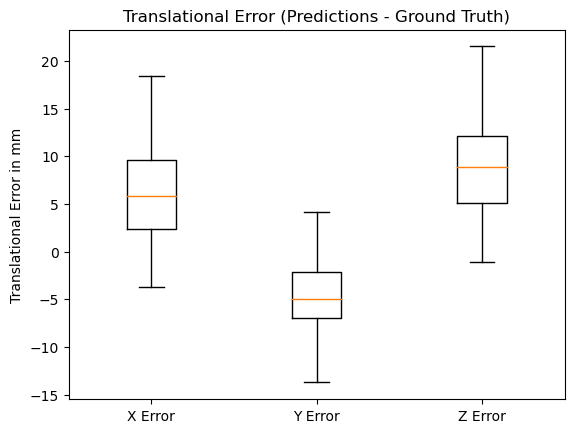

In [20]:
tx_ground_truths = []
tx_predictions = []
tx_errors = []
ty_ground_truths = []
ty_predictions = []
ty_errors = []
tz_ground_truths = []
tz_predictions = []
tz_errors = []
mount_angles = []
for sample in samples:
    if sample['prediction_translation'] == 'prediction error':
        continue
    ground_truth_tx = sample["ground_truth_translation"][0]
    prediction_tx = sample["prediction_translation"][0]
    ground_truth_ty = sample["ground_truth_translation"][1]
    prediction_ty = sample["prediction_translation"][1]
    ground_truth_tz = sample["ground_truth_translation"][2]
    prediction_tz = sample["prediction_translation"][2]
    mount_angle = sample["measured_angle_mount"]

    tx_ground_truths.append(ground_truth_tx)
    tx_predictions.append(prediction_tx)
    tx_errors.append((prediction_tx - ground_truth_tx)/10)
    ty_ground_truths.append(ground_truth_ty)
    ty_predictions.append(prediction_ty)
    ty_errors.append((prediction_ty - ground_truth_ty)/10)
    tz_ground_truths.append(ground_truth_tz)
    tz_predictions.append(prediction_tz)
    tz_errors.append((prediction_tz - ground_truth_tz)/10)
    mount_angles.append(mount_angle)


plt.boxplot([tx_errors, ty_errors, tz_errors], labels=['X Error', 'Y Error', 'Z Error'], showfliers=False)
#plt.scatter(mount_angles, tz_errors, marker='o', label='ground truth')
#plt.scatter(mount_angles, tz_predictions, marker='o', label='predictions')
#plt.legend()
plt.title('Translational Error (Predictions - Ground Truth)')
plt.ylabel('Translational Error in mm')
plt.show()

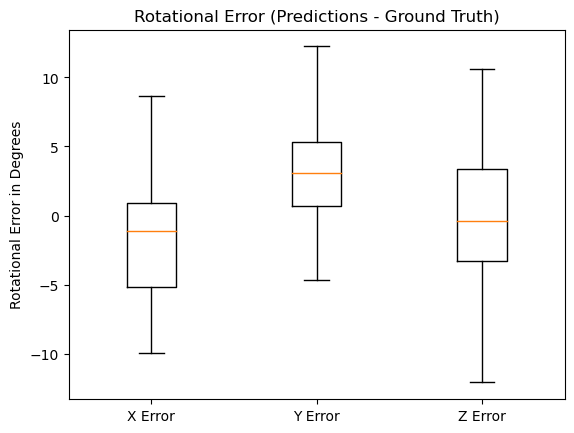

In [22]:
from scipy.spatial.transform import Rotation

rx_ground_truths = []
rx_predictions = []
rx_errors = []
ry_ground_truths = []
ry_predictions = []
ry_errors = []
rz_ground_truths = []
rz_predictions = []
rz_errors = []
mount_angles = []
for sample in samples:
    if sample['prediction_rotation'] == 'prediction error':
        continue
    ground_truth_rx, ground_truth_ry, ground_truth_rz = Rotation.from_quat(sample["ground_truth_rotation"]).as_euler('xyz')
    prediction_rx, prediction_ry, prediction_rz = Rotation.from_quat(sample["prediction_rotation"]).as_euler('xyz')
    ground_truth_rx = np.rad2deg(ground_truth_rx)
    ground_truth_ry = np.rad2deg(ground_truth_ry)
    ground_truth_rz = np.rad2deg(ground_truth_rz)
    prediction_rx = np.rad2deg(prediction_rx)
    prediction_ry = np.rad2deg(prediction_ry)
    prediction_rz = np.rad2deg(prediction_rz)
    mount_angle = sample["measured_angle_mount"]

    rx_ground_truths.append(ground_truth_rx)
    rx_predictions.append(prediction_rx)
    rx_errors.append((prediction_rx - ground_truth_rx))
    ry_ground_truths.append(ground_truth_ry)
    ry_predictions.append(prediction_ry)
    ry_errors.append((prediction_ry - ground_truth_ry))
    rz_ground_truths.append(ground_truth_rz)
    rz_predictions.append(prediction_rz)
    rz_errors.append((prediction_rz - ground_truth_rz))
    mount_angles.append(mount_angle)


plt.boxplot([rx_errors, ry_errors, rz_errors], labels=['X Error', 'Y Error', 'Z Error'], showfliers=False)
#plt.scatter(mount_angles, tz_errors, marker='o', label='ground truth')
#plt.scatter(mount_angles, tz_predictions, marker='o', label='predictions')
#plt.legend()
plt.title('Rotational Error (Predictions - Ground Truth)')
plt.ylabel('Rotational Error in Degrees')
plt.show()